<a href="https://colab.research.google.com/github/maheshkajjari/therabank/blob/master/therabank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling-1.csv to Bank_Personal_Loan_Modelling-1.csv


In [ ]:
import pandas as pd
import io
df= pd.read_csv(io.StringIO(uploaded['Bank_Personal_Loan_Modelling-1.csv'].decode('utf-8')))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

In [ ]:
sns.set(style="ticks")

In [ ]:
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


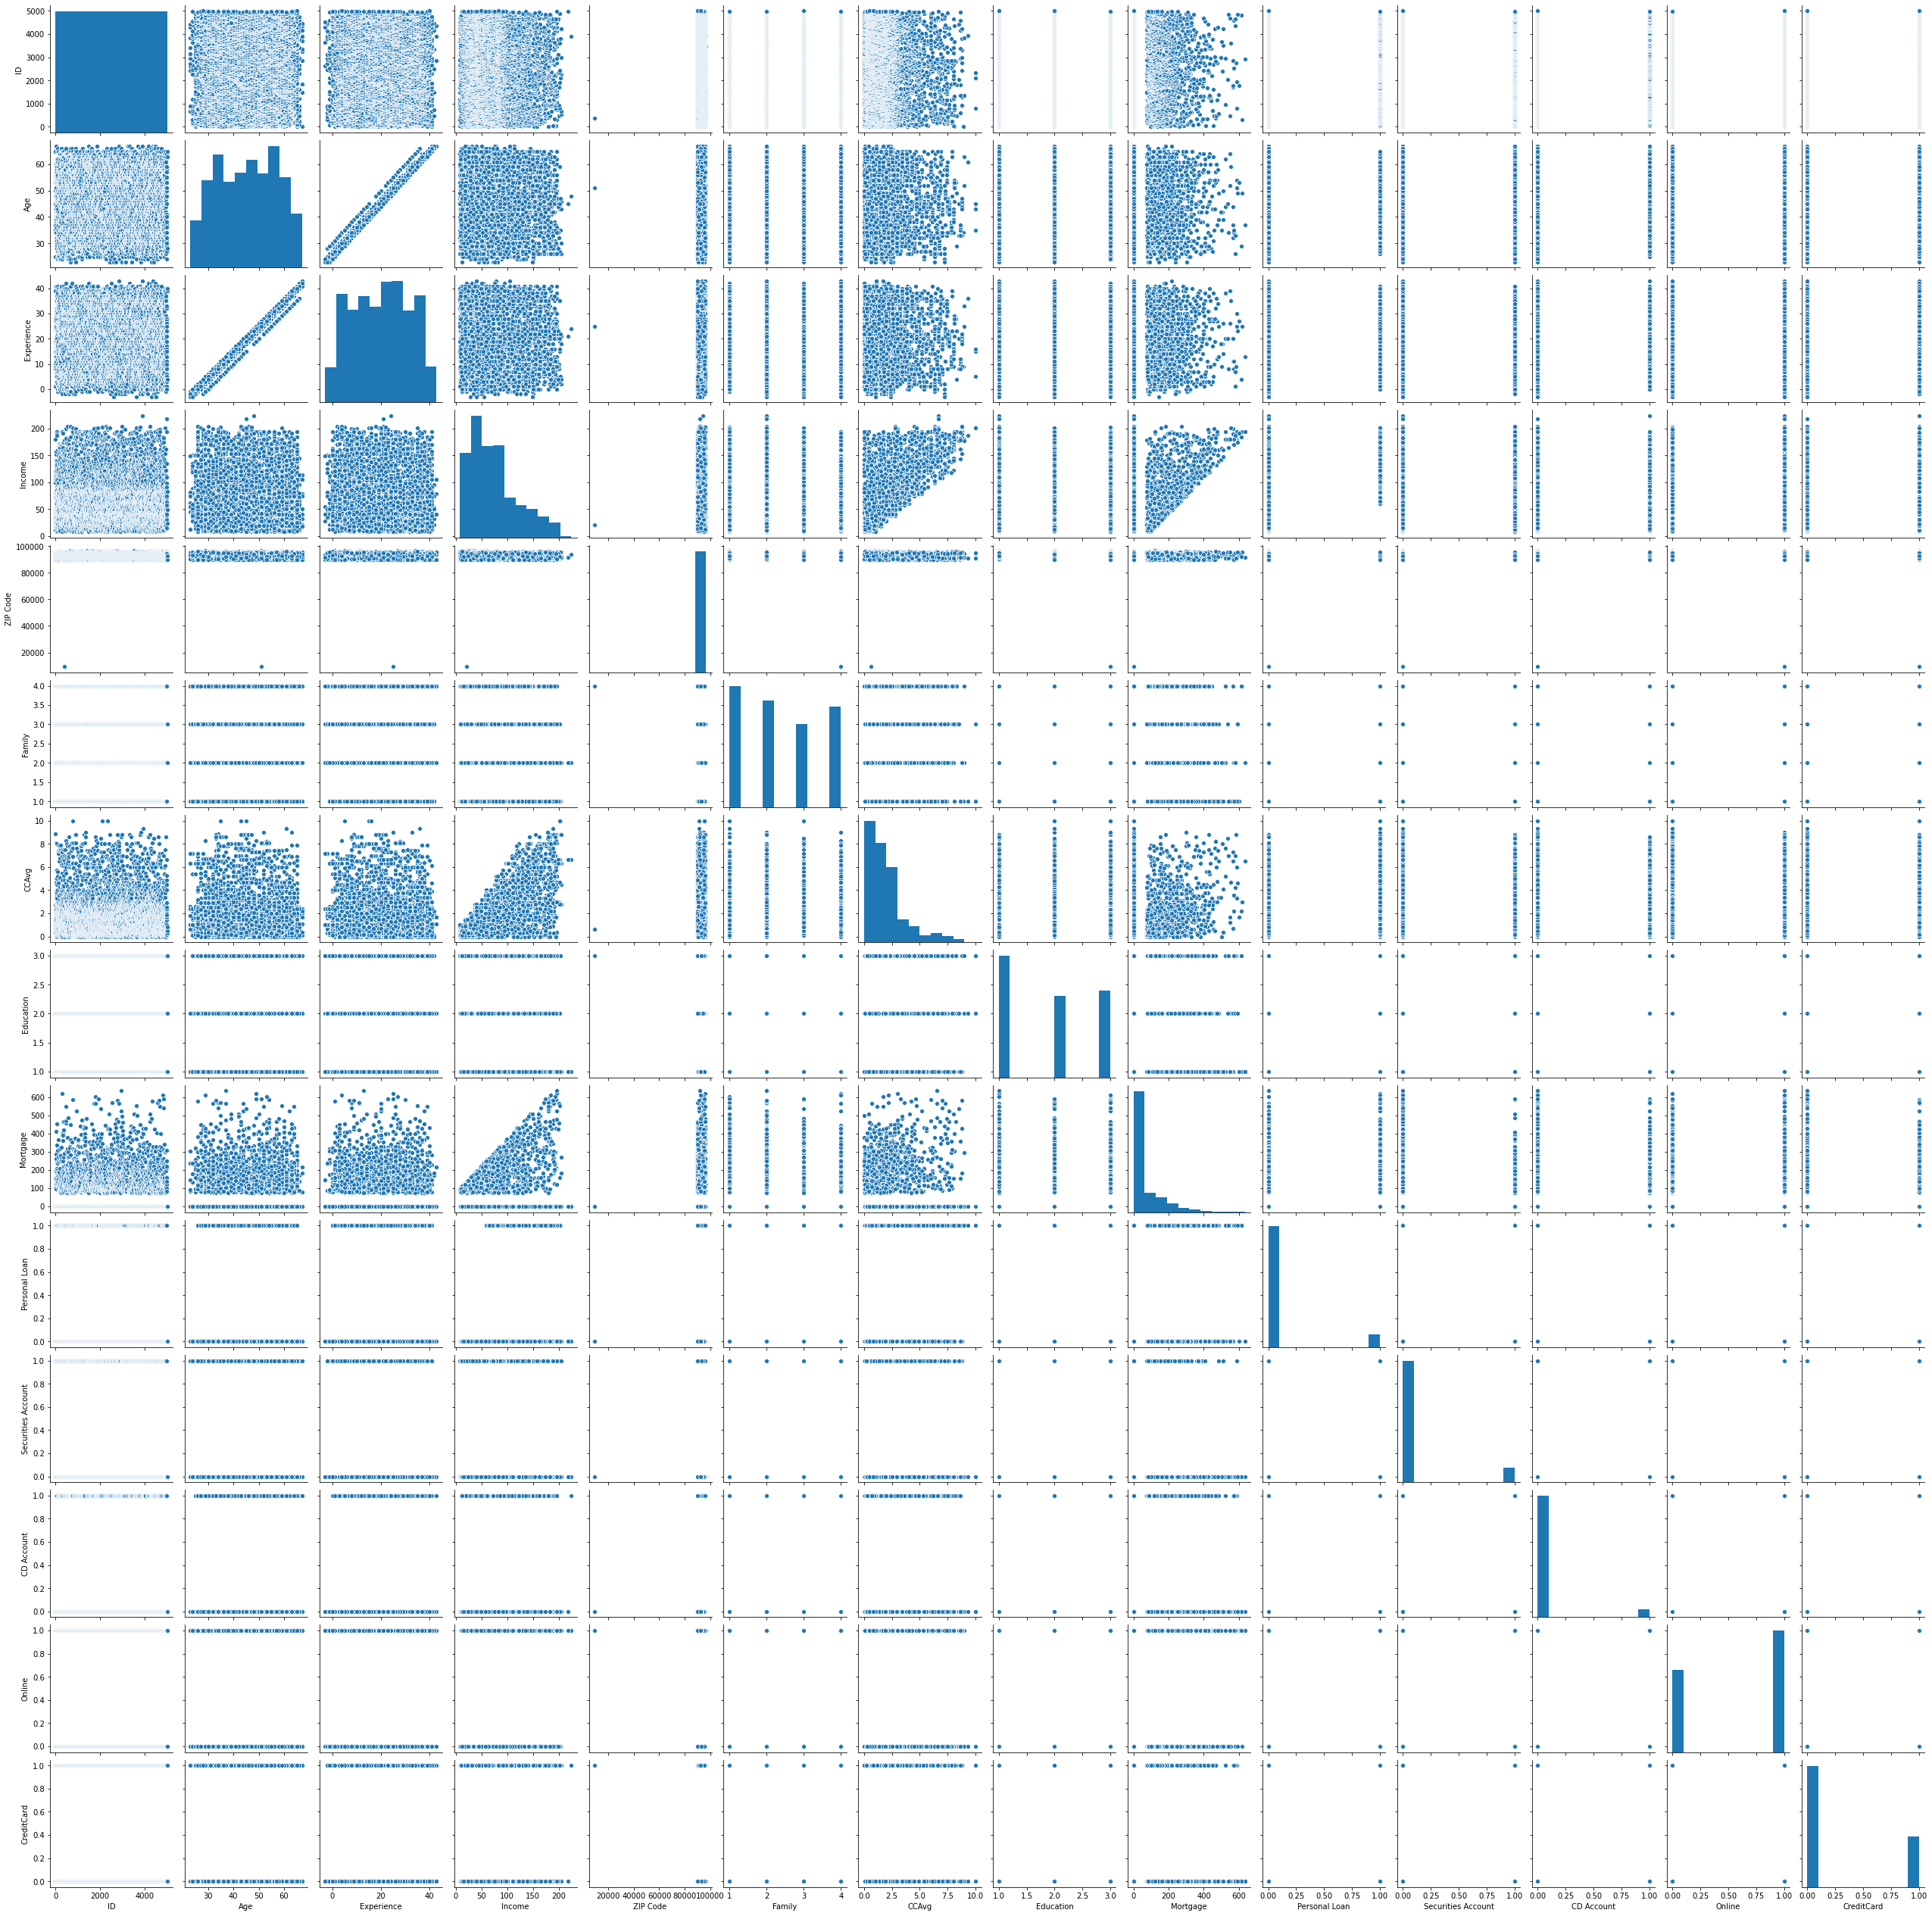

In [ ]:
plt = sns.pairplot(df)

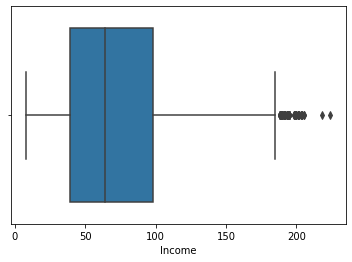

In [ ]:
 plt = sns.boxplot(df['Income'])

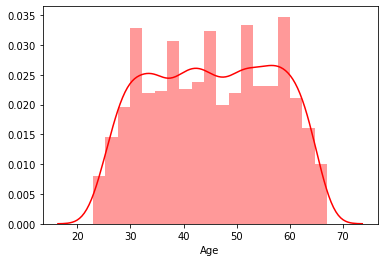

In [ ]:
sns.distplot( df['Age'], color = 'r')


#Observation

Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.


what is the influence of Income level on whether a customer takes a personal loan across the education levels.

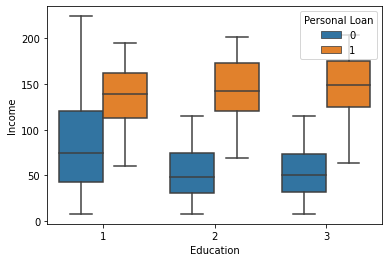

In [ ]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=df)


Observation

The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.


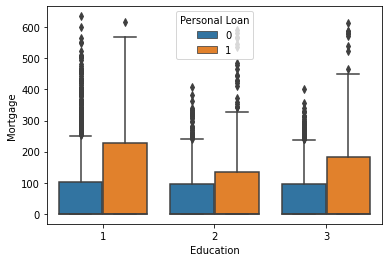

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)


Observation

Customers who taken loan also have higher mortgages.


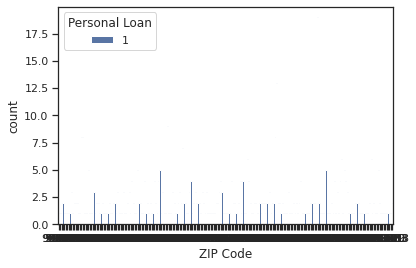

In [ ]:
sns.countplot(x="ZIP Code", data=df[df["Personal Loan"]==1] , hue ="Personal Loan",orient ='v')

In [ ]:
zipcode_top5 = df[df["Personal Loan"]==1]['ZIP Code'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

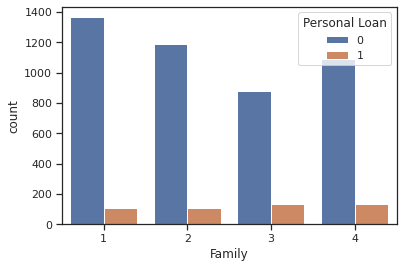

In [ ]:
sns.countplot(x="Family", data=df,hue="Personal Loan")


Observations
Does family size have any influence on whether a customer accepts a personal loan offer?¶


In [ ]:
familysize_no = np.mean( df[df["Personal Loan"]==0]['Family'] )
familysize_no

2.3734513274336284

In [ ]:
familysize_yes = np.mean( df[df['Personal Loan'] == 1]['Family'] )
familysize_yes

2.6125

In [ ]:
from scipy import stats

stats.ttest_ind(df[df['Personal Loan'] == 1]['Family'], df[df['Personal Loan'] == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)


Observation

Family size seems to have no impact on decision to take a loan.


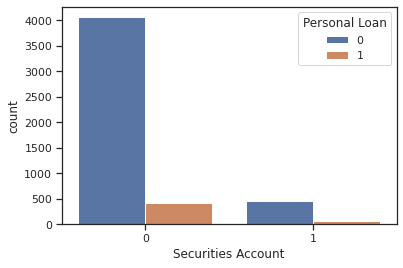

In [ ]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

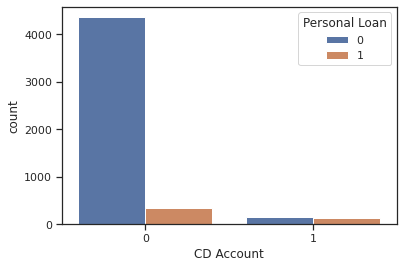

In [ ]:
sns.countplot(x="CD Account", data=df,hue="Personal Loan")

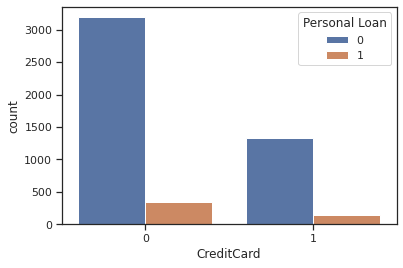

In [ ]:
sns.countplot(x="CreditCard", data=df,hue="Personal Loan")

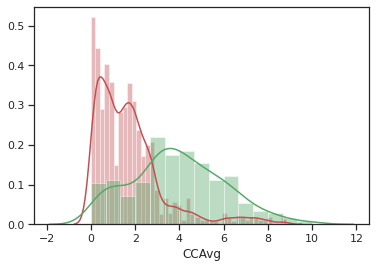

In [ ]:
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')


Observation

Customers who have taken personal loan have higher credit card average than those who did nottake. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.


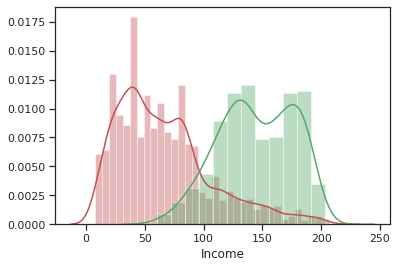

In [ ]:
sns.distplot( df[df['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['Income'], color = 'g')

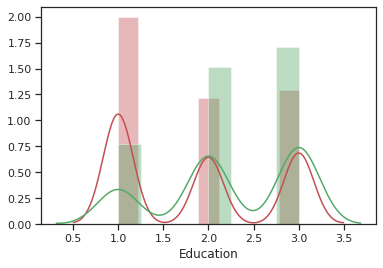

In [ ]:
sns.distplot(  df[df['Personal Loan'] == 0]['Education'], color = 'r')
sns.distplot(  df[df['Personal Loan'] == 1]['Education'], color = 'g')

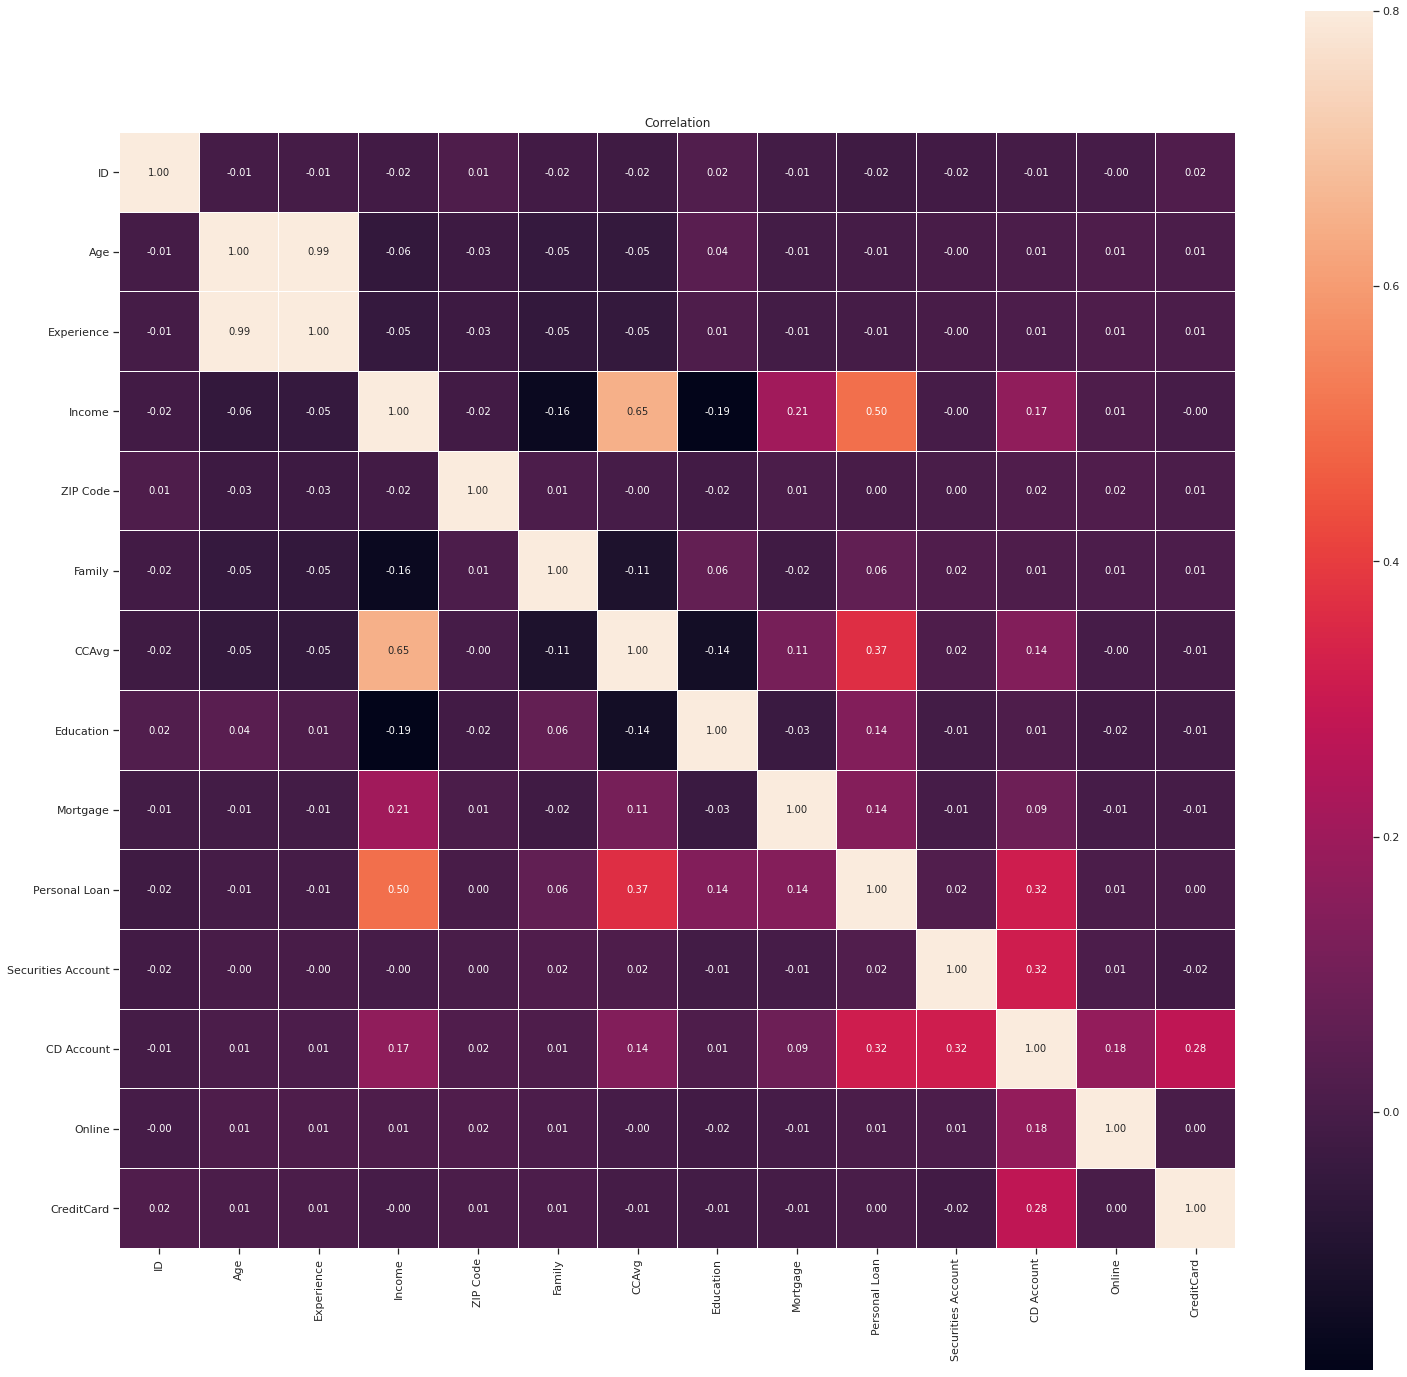

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()


Observation

    Age and Experoence is highly corelated
    Income and CCAvg also corelated




Splittin Data to Train And Test

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [ ]:
train_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("Personal Loan")
test_labels = test_set.pop("Personal Loan")

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [ ]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.score(test_set , test_labels)

0.974


#Naive Bayes

In [ ]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.9166666666666666

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79



#RandomForestClassifier

In [ ]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

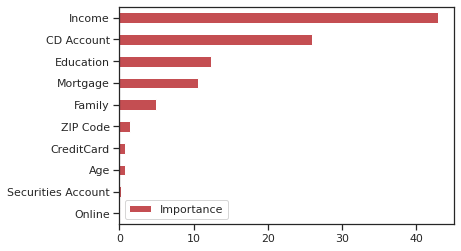

In [ ]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [ ]:
predicted_random=randomforest_model.predict(test_set)

In [ ]:
randomforest_model.score(test_set,test_labels)

0.9133333333333333

#KNeighborsClassifier

In [ ]:
train_set_indep = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [ ]:
print(acc)

0.9446297531687792


##from all the models we can observe that DecisionTreeClassifier has accuracy of 97.4, Naive Bayes has accuracy 91.6 , RandomForestClassifier has accuracy 91.3 avd KNeighborsClassifier has accuracy 94.4
